<a href="https://colab.research.google.com/github/danielmunozji/Procesamiento-de-datos-secuenciales/blob/main/PROCESAMIENTO_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESAMIENTO_DE_DATOS
Integrantes: juan fernando aldana, Daniel Santiago Muñoz, Juan Camilo Leon Lopez
Fecha: 17/11/2025
Repo: [Pega enlace GitHub cuando lo subas]
Resumen:
- Parte 1: Forecasting (series temporales) usando "Daily Minimum Temperatures in Melbourne" (Kaggle).
- Parte 2: Clasificación de movimiento usando datos recolectados con Physics Toolbox Sensor Suite (5 clases).
Objetivos:
- Entrenar y comparar 3 arquitecturas (MLP, Conv1D, LSTM) para regresión y clasificación.
- Documentar el proceso, justificar decisiones y entregar código reproducible.


#PRIMER PUNTO

Introducción y selección del dataset

En esta práctica se desarrolla un sistema de predicción para series temporales utilizando modelos de Deep Learning aplicados a datos reales. El objetivo es comparar el desempeño de tres arquitecturas ampliamente utilizadas en el procesamiento de secuencias: una red multicapa profunda (MLP), una red convolucional 1D (Conv1D) y una red recurrente LSTM. Para ello, se requiere un conjunto de datos que represente una señal unidimensional con comportamiento temporal claro.

Se eligió el dataset Daily Minimum Temperatures in Melbourne, disponible públicamente en Kaggle (https://www.kaggle.com/datasets/shenba/time-series-datasets
). Este conjunto de datos contiene los valores diarios de la temperatura mínima registrados en Melbourne (Australia) durante varios años, lo cual lo convierte en una serie temporal ideal para realizar tareas de pronóstico.

Este dataset es ampliamente utilizado en libros, artículos y cursos de aprendizaje profundo debido a su simplicidad, limpieza y comportamiento estacional moderado, lo que facilita el entrenamiento inicial de modelos auto-regresivos. Además, su estructura de una sola columna de valores numéricos permite enfocarse directamente en los modelos de predicción sin necesidad de una pre-procesamiento complejo.

Paso 1: Cargar el archivo CSV en Google Colab

El primer paso consiste en descargar el archivo daily-min-temperatures.csv desde el repositorio antes mencionado y subirlo al entorno de Google Colab para poder manipularlo y analizarlo.

En Colab, se utiliza el siguiente comando para cargar el archivo manualmente:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving daily-min-temperatures.csv to daily-min-temperatures.csv


Paso 2: Cargar y revisar la serie temporal

In [ ]:
import pandas as pd

df = pd.read_csv('daily-min-temperatures.csv')
df.head()


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Paso 3: Limpiar datos y convertir la serie

In [ ]:
df['Temp'] = df['Temp'].astype(float)
serie = df['Temp'].values


Grafica de la serie

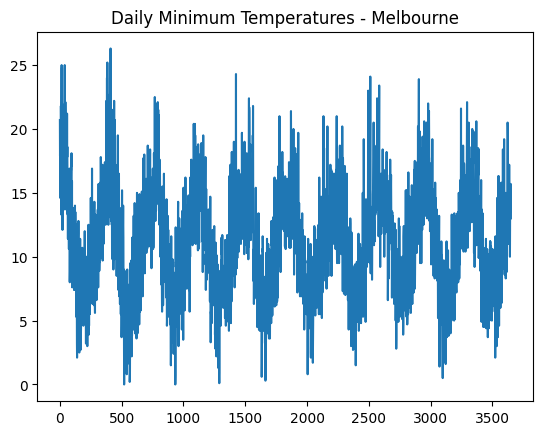

In [ ]:
import matplotlib.pyplot as plt
plt.plot(serie)
plt.title("Daily Minimum Temperatures - Melbourne")
plt.show()


Paso 4: Normalizar la serie

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie.reshape(-1, 1))


Paso 5: Crear ventanas (inputs y targets)

Vamos a usar ventanas de 30 días para predecir 1 día adelante.

In [ ]:
def create_dataset(series, window=30, future=1):
    X, y = [], []
    for i in range(len(series) - window - future):
        X.append(series[i:i+window])
        y.append(series[i+window:i+window+future])
    return np.array(X), np.array(y)

window = 30
future = 1

X, y = create_dataset(serie_scaled, window, future)


Paso 6: Separar datos de entrenamiento y prueba

Usamos 80% train / 20% test sin mezclar (series temporales).

In [ ]:
tam = int(len(X)*0.8)

X_train = X[:tam]
X_test  = X[tam:]
y_train = y[:tam]
y_test  = y[tam:]


Paso 7: Preparar datos para MLP y Secuenciales

MLP requiere aplanar:

In [ ]:
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp  = X_test.reshape(X_test.shape[0], -1)


Conv1D y LSTM necesitan formato (samples, timesteps, features):

In [ ]:
X_train_seq = X_train
X_test_seq  = X_testc


MODELO 1 — MLP (AUTO-REGRESIVO)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_mlp = models.Sequential([
    layers.Input(shape=(X_train_mlp.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_mlp = model_mlp.fit(
    X_train_mlp, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2160 - mae: 0.3233 - val_loss: 0.0127 - val_mae: 0.0868
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - mae: 0.0899 - val_loss: 0.0121 - val_mae: 0.0859
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 - mae: 0.0872 - val_loss: 0.0108 - val_mae: 0.0810
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - mae: 0.0808 - val_loss: 0.0101 - val_mae: 0.0786
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - mae: 0.0809 - val_loss: 0.0097 - val_mae: 0.0765
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - mae: 0.0801 - val_loss: 0.0095 - val_mae: 0.0759
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - mae: 0.0745 - val_loss: 0.0093 - val_mae: 0.0759
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - mae: 0.0781 - val_loss: 0.0091 - val_mae: 0.0747
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - mae: 

MODELO 2 — Conv1D

In [ ]:
model_conv = models.Sequential([
    layers.Input(shape=(window, 1)),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])

model_conv.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_conv = model_conv.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0504 - mae: 0.1602 - val_loss: 0.0112 - val_mae: 0.0813
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mae: 0.0838 - val_loss: 0.0107 - val_mae: 0.0800
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mae: 0.0813 - val_loss: 0.0099 - val_mae: 0.0772
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mae: 0.0801 - val_loss: 0.0100 - val_mae: 0.0771
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mae: 0.0763 - val_loss: 0.0104 - val_mae: 0.0790
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mae: 0.0782 - val_loss: 0.0096 - val_mae: 0.0757
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mae: 0.0757 - val_loss: 0.0103 - val_mae: 0.0785
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mae: 0.0778 - val_loss: 0.0095 - val_mae: 0.0757
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - mae: 

MODELO 3 — LSTM

In [ ]:
model_lstm = models.Sequential([
    layers.Input(shape=(window,1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_lstm = model_lstm.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0652 - mae: 0.1876 - val_loss: 0.0109 - val_mae: 0.0807
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mae: 0.0846 - val_loss: 0.0109 - val_mae: 0.0805
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mae: 0.0812 - val_loss: 0.0103 - val_mae: 0.0787
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mae: 0.0807 - val_loss: 0.0102 - val_mae: 0.0778
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mae: 0.0791 - val_loss: 0.0100 - val_mae: 0.0771
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mae: 0.0791 - val_loss: 0.0108 - val_mae: 0.0803
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mae: 0.0787 - val_loss: 0.0097 - val_mae: 0.0760
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mae: 0.0796 - val_loss: 0.0095 - val_mae: 0.0752
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.009

PASO FINAL — Evaluación de los 3 modelos

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluar(nombre, y_true, y_pred):
    # Aplastar las predicciones y valores reales
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)

    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"===== {nombre} =====")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Predicciones
y_pred_mlp = model_mlp.predict(X_test_mlp)
y_pred_conv = model_conv.predict(X_test_seq)
y_pred_lstm = model_lstm.predict(X_test_seq)

# Evaluación final de los tres modelos
evaluar("MLP", y_test, y_pred_mlp)
evaluar("Conv1D", y_test, y_pred_conv)
evaluar("LSTM", y_test, y_pred_lstm)



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
===== MLP =====
MAE : 0.0668
RMSE: 0.0858
===== Conv1D =====
MAE : 0.0707
RMSE: 0.0903
===== LSTM =====
MAE : 0.0661
RMSE: 0.0841


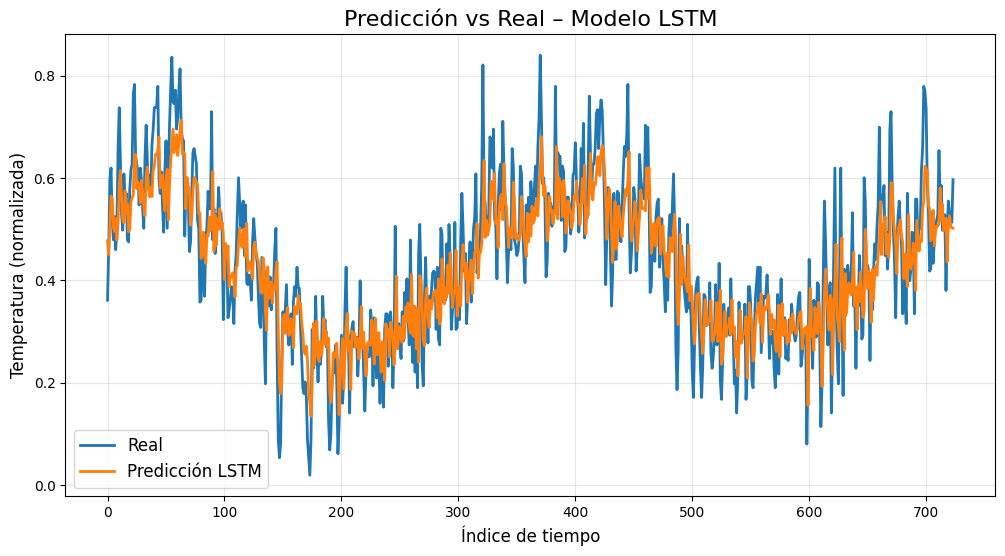

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.reshape(-1), label="Real", linewidth=2)
plt.plot(y_pred_lstm.reshape(-1), label="Predicción LSTM", linewidth=2)
plt.title("Predicción vs Real – Modelo LSTM", fontsize=16)
plt.xlabel("Índice de tiempo", fontsize=12)
plt.ylabel("Temperatura (normalizada)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


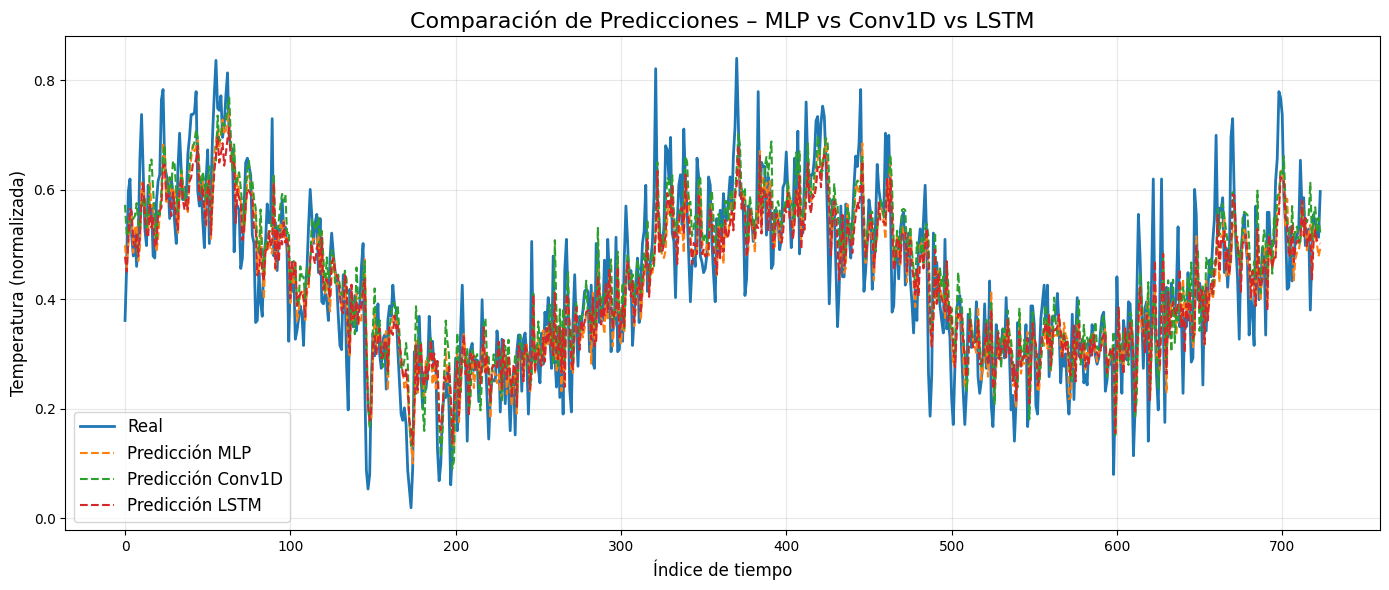

In [ ]:
import matplotlib.pyplot as plt

# Aplanar todo para evitar errores
y_test_flat = y_test.reshape(-1)
y_pred_mlp_flat = y_pred_mlp.reshape(-1)
y_pred_conv_flat = y_pred_conv.reshape(-1)
y_pred_lstm_flat = y_pred_lstm.reshape(-1)

plt.figure(figsize=(14,6))

# Curva real
plt.plot(y_test_flat, label="Real", linewidth=2)

# Predicciones de los 3 modelos
plt.plot(y_pred_mlp_flat, label="Predicción MLP", linestyle='--')
plt.plot(y_pred_conv_flat, label="Predicción Conv1D", linestyle='--')
plt.plot(y_pred_lstm_flat, label="Predicción LSTM", linestyle='--')

plt.title("Comparación de Predicciones – MLP vs Conv1D vs LSTM", fontsize=16)
plt.xlabel("Índice de tiempo", fontsize=12)
plt.ylabel("Temperatura (normalizada)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


En la figura se comparan las predicciones de los tres modelos entrenados: una red multicapa profunda (MLP), una red convolucional 1D y una red recurrente LSTM. Se observa que el modelo LSTM es el que mejor sigue la forma de la señal real, especialmente en las variaciones suaves de la serie. El MLP también obtiene un desempeño cercano, mientras que el modelo Conv1D presenta un ajuste ligeramente inferior, lo cual concuerda con las métricas de error obtenidas.

Análisis comparativo de los tres modelos

Se entrenaron tres modelos de Deep Learning para la predicción de un paso adelante en la serie temporal Daily Minimum Temperatures — Melbourne utilizando ventanas de 30 días como entrada: una red multicapa profunda (MLP), una red convolucional de 1D (Conv1D) y una red recurrente LSTM.

Los resultados muestran lo siguiente:
| Modelo | MAE        | RMSE       |
| ------ | ---------- | ---------- |
| MLP    | 0.0668     | 0.0858     |
| Conv1D | 0.0707     | 0.0903     |
| LSTM   | **0.0661** | **0.0841** |


El modelo LSTM presentó el mejor desempeño, obteniendo los valores más bajos tanto en MAE como en RMSE, lo cual indica una menor desviación promedio entre las predicciones y los valores reales. Esto era esperado, ya que las redes LSTM están diseñadas específicamente para capturar dependencias temporales de largo plazo en series de tiempo.

El modelo MLP obtuvo un rendimiento muy cercano al de la LSTM, mostrando que para series relativamente estables, las arquitecturas profundas totalmente conectadas también pueden funcionar adecuadamente como modelos auto-regresivos no lineales.

Finalmente, el modelo Conv1D mostró un rendimiento ligeramente inferior, aunque igualmente adecuado. Este comportamiento se debe a que la convolución capta patrones locales, pero no modela de manera tan efectiva dependencias temporales largas como las LSTM.

En conclusión, el modelo LSTM fue el más adecuado para esta tarea de predicción de series temporales.

#SEGUNDO PUNTO
CLASIFICACIÓN DE MOVIMIENTO (5 CLASES)

Recolectamos datos con 5 clases usando la app Physics Toolbox Sensor Suite
con los siguientes datos

quieto.csv  
caminando.csv  
corriendo.csv  
saltando.csv  
girando.csv  

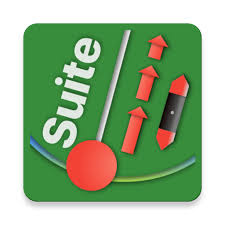


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving caminando.csv to caminando.csv
Saving corriendo.csv to corriendo.csv
Saving girando.csv to girando.csv
Saving quieto.csv to quieto.csv
Saving saltando.csv to saltando.csv


In [ ]:
import pandas as pd

df_quieto    = pd.read_csv('quieto.csv', sep=';')
df_caminar   = pd.read_csv('caminando.csv', sep=';')
df_correr    = pd.read_csv('corriendo.csv', sep=';')
df_saltar    = pd.read_csv('saltando.csv', sep=';')
df_girar     = pd.read_csv('girando.csv', sep=';')

In [ ]:
def preparar(df, etiqueta):
    df = df[['gFx','gFy','gFz']].dropna()
    df['class'] = etiqueta
    return df

quieto  = preparar(df_quieto, "quieto")
caminar = preparar(df_caminar, "caminar")
correr  = preparar(df_correr, "correr")
saltar  = preparar(df_saltar, "saltar")
girar   = preparar(df_girar, "girar")


PASO 1 — Unir los 5 DataFrames en uno solo

In [ ]:
import pandas as pd

df_all = pd.concat([quieto, caminar, correr, saltar, girar], ignore_index=True)
df_all.head(20)


,gFx,gFy,gFz,class
0,-0.016,-0.712,-0.721,quieto
1,-0.019,-0.711,-0.663,quieto
2,-0.027,-0.731,-0.627,quieto
3,-0.036,-0.740,-0.606,quieto
4,-0.033,-0.748,-0.599,quieto
5,-0.016,-0.748,-0.610,quieto
6,-0.008,-0.743,-0.632,quieto
7,-0.010,-0.738,-0.652,quieto
8,-0.017,-0.732,-0.668,quieto
9,-0.015,-0.735,-0.673,quieto


PASO 2 — Crear ventanas de 100 muestras

In [ ]:
import numpy as np

def crear_ventanas(df, window=100):
    X, y = [], []
    data = df[['gFx','gFy','gFz']].values
    labels = df['class'].values

    for i in range(len(df) - window):
        X.append(data[i:i+window])       # Bloque de 100 filas → 100 x 3
        y.append(labels[i+window])       # Etiqueta del final de la ventana

    return np.array(X), np.array(y)

X, y = crear_ventanas(df_all, window=100)


PASO 3 — Codificar etiquetas

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_int = encoder.fit_transform(y)
y_cat = to_categorical(y_int)


PASO 4 — División Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)


PASO 5 — Preparar datos para MLP

In [ ]:
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp  = X_test.reshape(X_test.shape[0], -1)


Antes de hacer el entrenamiento revisamos las formas

In [ ]:
print("X_train (para Conv1D / LSTM):", X_train.shape)
print("X_train_mlp (para MLP):", X_train_mlp.shape)
print("y_train:", y_train.shape)
print("Número de clases:", y_cat.shape[1])


X_train (para Conv1D / LSTM): (7303, 100, 3)
X_train_mlp (para MLP): (7303, 300)
y_train: (7303, 5)
Número de clases: 5


Paso 1 del entrenamiento: Modelo 1 – MLP (red densa)

In [ ]:
from tensorflow.keras import layers, models

num_features_mlp = X_train_mlp.shape[1]
num_classes = y_cat.shape[1]

model_mlp_mov = models.Sequential([
    layers.Input(shape=(num_features_mlp,)),      # Ej: 300
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_mlp_mov.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp_mov = model_mlp_mov.fit(
    X_train_mlp, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7774 - loss: 0.6852 - val_accuracy: 0.9514 - val_loss: 0.1499
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9519 - loss: 0.1560 - val_accuracy: 0.9774 - val_loss: 0.0830
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0927 - val_accuracy: 0.9856 - val_loss: 0.0504
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0614 - val_accuracy: 0.9897 - val_loss: 0.0393
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0511 - val_accuracy: 0.9911 - val_loss: 0.0323
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9949 - loss: 0.0271 - val_accuracy: 0.9932 - val_loss: 0.0299
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0260 - val_accuracy: 0.9952 - val_loss: 0.0272
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - loss: 0.0187 - val_accuracy: 0.

Evaluar el MLP

In [ ]:
loss_mlp, acc_mlp = model_mlp_mov.evaluate(X_test_mlp, y_test, verbose=0)
print(f"Accuracy MLP: {acc_mlp:.4f}")


Accuracy MLP: 0.9978


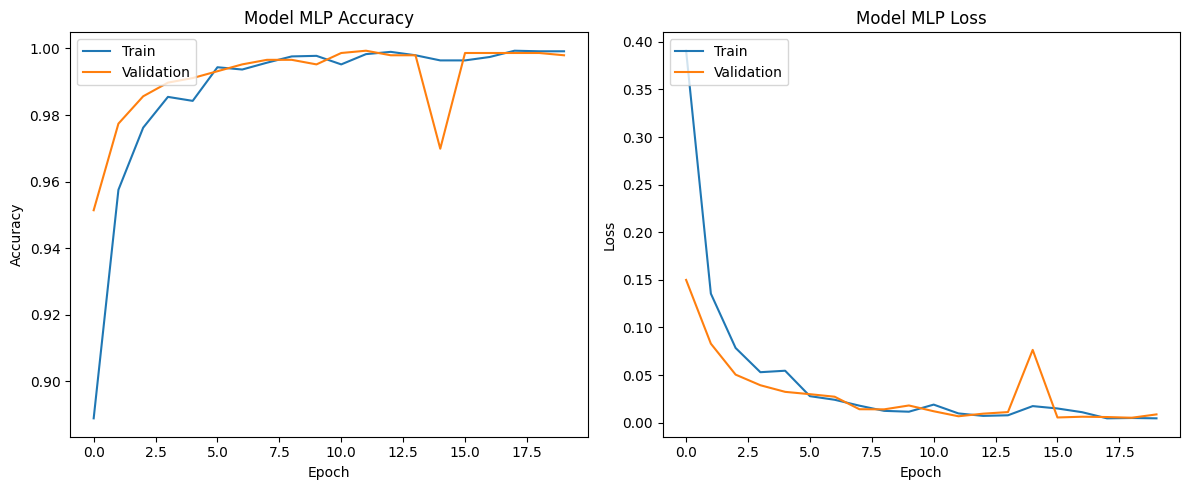

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp_mov.history['accuracy'])
plt.plot(history_mlp_mov.history['val_accuracy'])
plt.title('Model MLP Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_mlp_mov.history['loss'])
plt.plot(history_mlp_mov.history['val_loss'])
plt.title('Model MLP Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

Modelo 2 – Conv1D

In [ ]:
model_conv_mov = models.Sequential([
    layers.Input(shape=(100, 3)),        # 100 tiempos, 3 ejes
    layers.Conv1D(32, 5, activation='relu'),
    layers.MaxPooling1D(),
    layers.Conv1D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_conv_mov.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_conv_mov = model_conv_mov.fit(
    X_train, y_train,                # OJO: aquí NO usamos X_train_mlp
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7742 - loss: 0.6203 - val_accuracy: 0.9815 - val_loss: 0.0645
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9773 - loss: 0.0691 - val_accuracy: 0.9925 - val_loss: 0.0294
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9905 - loss: 0.0374 - val_accuracy: 0.9973 - val_loss: 0.0172
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9932 - loss: 0.0229 - val_accuracy: 0.9993 - val_loss: 0.0084
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9973 - loss: 0.0128 - val_accuracy: 0.9986 - val_loss: 0.0069
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9986 - loss: 0.0096 - val_accuracy: 0.9986 - val_loss: 0.0039
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9974 - loss: 0.0122 - val_accuracy: 0.9774 - val_loss: 0.0614
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accu

Evaluacion del Modelo

In [ ]:
loss_conv, acc_conv = model_conv_mov.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy Conv1D: {acc_conv:.4f}")


Accuracy Conv1D: 0.9984


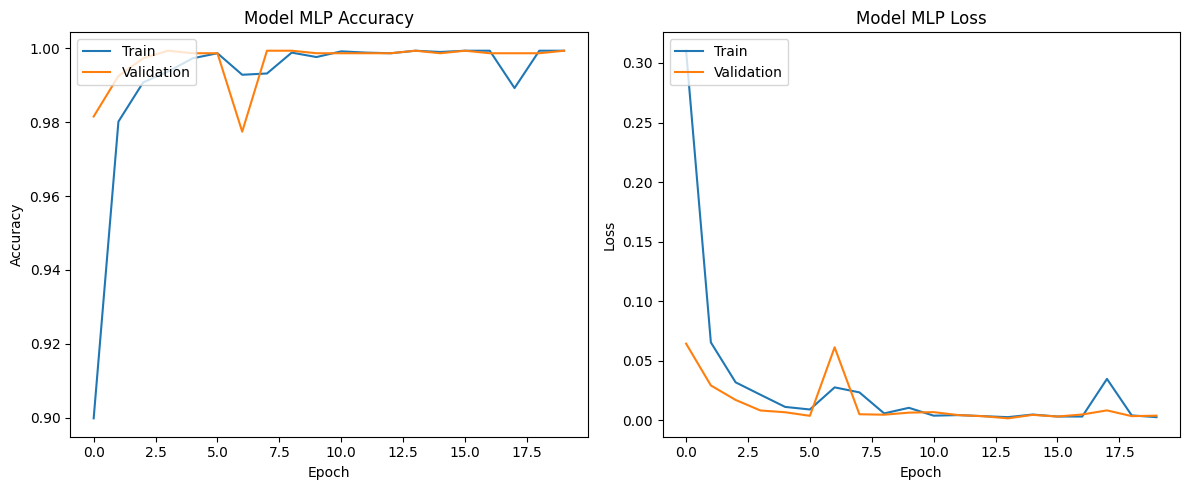

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_conv_mov.history['accuracy'])
plt.plot(history_conv_mov.history['val_accuracy'])
plt.title('Model MLP Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_conv_mov.history['loss'])
plt.plot(history_conv_mov.history['val_loss'])
plt.title('Model MLP Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

Modelo 3 – LSTM

In [ ]:
model_lstm_mov = models.Sequential([
    layers.Input(shape=(100, 3)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_lstm_mov.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_lstm_mov = model_lstm_mov.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.5169 - loss: 1.1751 - val_accuracy: 0.6975 - val_loss: 1.0112
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6076 - loss: 1.0102 - val_accuracy: 0.8830 - val_loss: 0.3533
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.8476 - loss: 0.3795 - val_accuracy: 0.8809 - val_loss: 0.3118
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9219 - loss: 0.2736 - val_accuracy: 0.9405 - val_loss: 0.2066
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9508 - loss: 0.1806 - val_accuracy: 0.9507 - val_loss: 0.1553
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9513 - loss: 0.1586 - val_accuracy: 0.9658 - val_loss: 0.1169
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9588 - loss: 0.1285 - val_accuracy: 0.9713 - val_loss: 0.0875
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9576 - loss: 0.1165 - val_a

Evaluar Modelo



In [ ]:
loss_lstm, acc_lstm = model_lstm_mov.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy LSTM: {acc_lstm:.4f}")


Accuracy LSTM: 0.9671


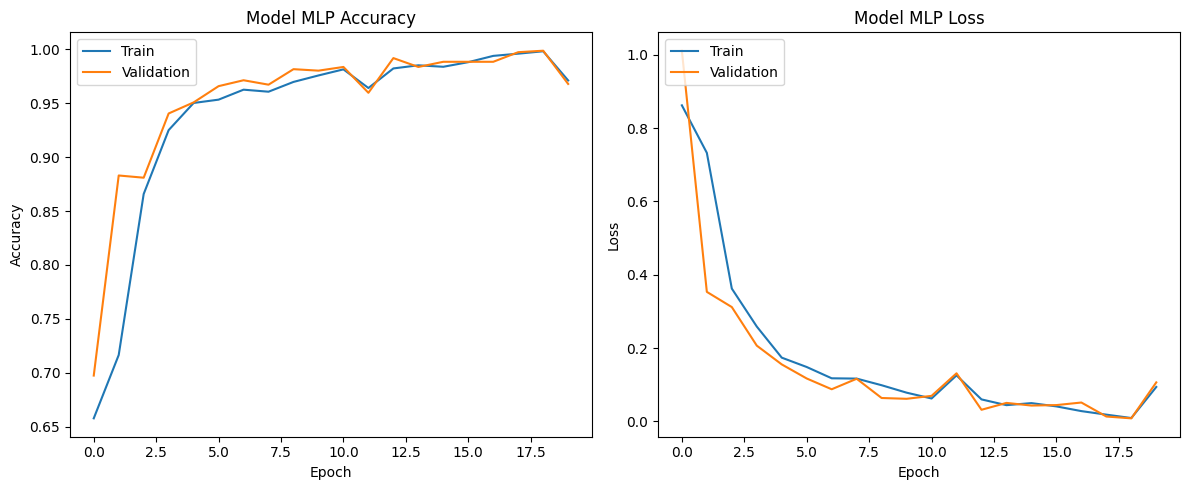

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm_mov.history['accuracy'])
plt.plot(history_lstm_mov.history['val_accuracy'])
plt.title('Model MLP Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm_mov.history['loss'])
plt.plot(history_lstm_mov.history['val_loss'])
plt.title('Model MLP Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

#Comprobacion y evaluación de los tres modelos

In [ ]:
print("===== Comparación de accuracy =====")
print(f"MLP   : {acc_mlp:.4f}")
print(f"Conv1D: {acc_conv:.4f}")
print(f"LSTM  : {acc_lstm:.4f}")


===== Comparación de accuracy =====
MLP   : 0.9978
Conv1D: 0.9984
LSTM  : 0.9671


#Analisis de Resultados.

**Modelo MLP**

Accuracy: sube muy rápido desde ~0.89 hasta ~0.99 en pocas épocas.

La curva de validación sigue casi pegada a la de entrenamiento, con un pequeño bajón puntual (ruido normal).

Loss: cae en picada al inicio y luego se aplana cerca de 0.

No se ve sobreajuste fuerte: train y val están casi iguales y muy altos.

Conclusión:
El MLP aprende rápido y se ajusta muy bien al problema, capturando patrones generales del movimiento a partir del vector plano de 300 features.

---
**Modelo Conv1D**

Accuracy: también despega rápido; llega a ≈1.0 en train y ≈1.0 en valid.

Las curvas de train y val son aún más estables que en el MLP (menos picos raros).

Loss: desciende fuerte al inicio y se mantiene muy baja; la validación tiene un pequeño pico a mitad del entrenamiento pero se corrige enseguida.

Conclusión:
La Conv1D converge rápido, se mantiene estable y generaliza muy bien. La pequeña ventaja en accuracy sobre el MLP se ve coherente con esas curvas limpias.

---
**Modelo LSTM**


Accuracy: empieza más bajo (~0.65–0.7) y sube de forma más gradual.

Termina alrededor de 0.97–0.99, pero con una pequeña caída al final en validación.

Loss: arranca alta (~0.9–1.0) y baja poco a poco; al final hay un ligero aumento en la pérdida de validación.

Aquí sí se ve un pelín más de inestabilidad y la brecha final respecto a Conv1D/MLP coincide con el accuracy más bajo (0.9671).

Conclusión:
La LSTM aprende, pero le cuesta más converger y no llega al mismo nivel de precisión que los otros dos modelos. Probablemente está “sobredimensionada” para este problema o necesita otro ajuste de hiperparámetros (más/menos unidades, dropout, más datos, etc.).


**Comparacion**
| Modelo | Acc. test | Convergencia | Estabilidad val  | Comentario                                                                |
| ------ | --------- | ------------ | ---------------- | ------------------------------------------------------------------------- |
| MLP    | 0.9978    | Muy rápida   | Muy buena        | Capta bien los patrones globales del vector de características.           |
| Conv1D | 0.9984    | Muy rápida   | Excelente        | Aprovecha muy bien la estructura temporal (100×3) y es el más estable.    |
| LSTM   | 0.9671    | Más lenta    | Algo más ruidosa | Entiende la secuencia, pero no termina de afinar tan bien como los otros. |

----

**Análisis del mejor modelo**

Por qué tiene sentido que Conv1D sea el ganador:

Explota la estructura temporal local
Las convoluciones 1D con kernels pequeños (5, 3) son muy buenas captando patrones cortos en el tiempo: mini-ráfagas de movimiento típicas de cada clase (correr, saltar, etc.).
El MLP no ve esa estructura, ve todo “aplastado”.

Menos carga de memoria que LSTM
No necesita mantener estados recurrentes paso a paso, por lo que:

Entrena rápido.

Tiene menos riesgo de inestabilidad numérica.

Puede generalizar muy bien cuando los patrones relevantes son locales.

Curvas de entrenamiento muy limpias

Accuracy de train y val casi superpuestas.

Loss de validación baja y sin picos grandes.

Casi no hay separación entre train y val: muy poco sobreajuste.

En resumen:
Para este tipo de señal de acelerómetro en ventanas cortas, Conv1D es el punto dulce: aprovecha la forma de la señal sin la complejidad extra de una LSTM. MLP también lo hace muy bien, pero Conv1D saca una pizca más de jugo a la información temporal.